# Markov Chain

Markov Chain merupakan Teknik perhitungan stokastik yang digunakan dalam melakukan percobaan permodelan berbagai kondisi. Markov Chain digunakan dengan tujuan supaya membantu memperkirakan perubahan yang terjadi di masa mendatang yang diwakili dalam variabel dinamis di waktu tertentu. Markov berfokus pada perluasan hukum bilangan besar di berbagai percobaan, yang dimana berhubungan dengan rangkaian proses suatu kejadian akibat adanya eksperimen yang hanya tergantung pada kejadian yang langsung mendahuluinya dan tidak tergantung pada rangkaian kejadian sebelumnya. (Binus University, 2013)

Model ini ditemukan oleh ahli Rusia, A.A Markov pada tahun 1906, yaitu :
“Untuk setiap waktu t, ketika kejadian adalah Kt dan seluruh kejadian sebelumnya adalah Kt(j), ... , Kt(j-n) yang terjadi dari proses yang diketahui, probabilitas seluruh kejadian yang akan datang Kt(j) hanya bergantung pada kejadian Kt(j-1) dan tidak bergantung pada kejadian-kejadian sebelumnya yaitu Kt(j-2), Kt(j-3),..., Kt(j-n).”


alur dalam Markov Chain


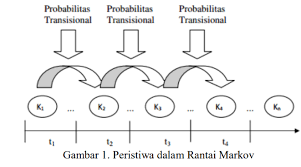

In [6]:
from PIL import Image

img = Image.open("D:/Matana/Semester 4/komputasi statistik/UTS/images.png")
img

Kejadian ini bersifat berantai. Secara sistematis, dapat ditulis :

K_t(j) =P×K_(t(j-1))

Dimana, 
K_t(j)  = peluang kejadian pada t(j)
P= Probabilitas Transisional
t(j) = waktu ke-j 


# Hidden Markov Model

HMM merupakan suatu model statistic yang dimana suatu sistem dimodelkan dan diasumsikan sebagai Markov proses dengan kondisi yang tidak terobservasi. HMM juga dianggap sebagai jaringan Bayesian dinamis sederhana (simplest dynamic Bayesian network) (Prasetyo, 2011). Probabilitas dari satu state ke state lain disebut transition probability yang dimana tiap state dibentuk dari sejumlah elemen atau symbol (Studi et al., 2008). HMM dapat digunakan untuk aplikasi bidang temporal pattern recognition seperti pengenalan suara, tulisan, gestur, bioinformatika, kompresi kalimat, computer vision, dan lain lain(Prasetyo, 2011). 
(Rabiner, 1989 dalam (Studi et al., 2008)) mengatakan sebuah Hidden Markov Model dikarakteristikkan dengan parameter berikut :
-	N, jumlah state dalam model,
-	M, jumlah symbol pengamatan yang dimiliki setiap state,
-	A = {aij}, aij = P(qt+1 = Sj | qt = Sj), himpunan distribusi kemungkinan perpindahan state,
-	B = {bj(k)}, bj(k) = P(vk pada t | qt = Sj), himpunan distribusi kemungkinan simbol pengamatan pada state j (emission probability). 
-	π = {πi}, πi = P(q1 = Si), himpunan distribusi kemungkinan state awal.


Bentuk ringkas HMM :
λ = (A, B, π)


Alur HMM :

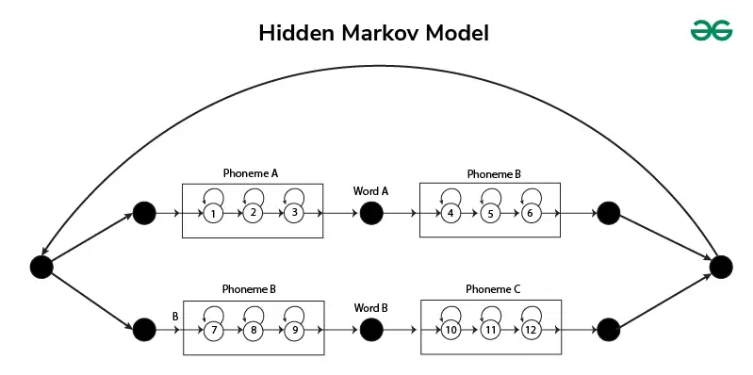

In [7]:
img = Image.open("D:/Matana/Semester 4/komputasi statistik/UTS/alurhmm.png")
img

# Running data Markov chain di R

In [ ]:
data <- read.csv("D:/Matana/Semester 4/komputasi statistik/UTS/stocks_AAPL.csv")
data <- data %>% 
  arrange(date) %>% 
  mutate(
    Return = (close - lag(close)) / lag(close),
    LogReturn = log(close / lag(close)),
    Volatility = rollapply(LogReturn, width = 10, FUN = sd, fill = NA, align = "right")
  )
head(data)
data$State <- ifelse(data$LogReturn > 0.005, "Up", ifelse(data$LogReturn < -0.005, "Down", "Stable"))

markov_model <- markovchainFit(data$State)$estimate
print(markov_model)

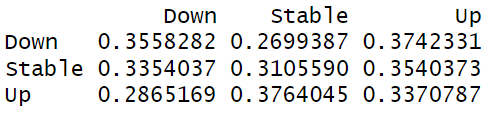

In [8]:
img = Image.open("D:/Matana/Semester 4/komputasi statistik/UTS/hasil_MC.png")
img

-	didapatkan bahwa probabilitas nilai yang down berpotensi tetap down sebesar 36%, down menjadi stable sebesar 34%, down menjadi up sebesar 29%.
-	selanjutnya, stable menjadi down sebesar 27%, stable tetap stable 31%, dan stable menjadi up sebesar 38%.
-	dan berikutnya, up menjadi down sebesar 37%, up menjadi stable 35%, dan up tetap akan up sebesar 33.7%.


Model is not converging.  Current: 1390.1128959221078 is not greater than 1390.1207507150314. Delta is -0.007854792923581044


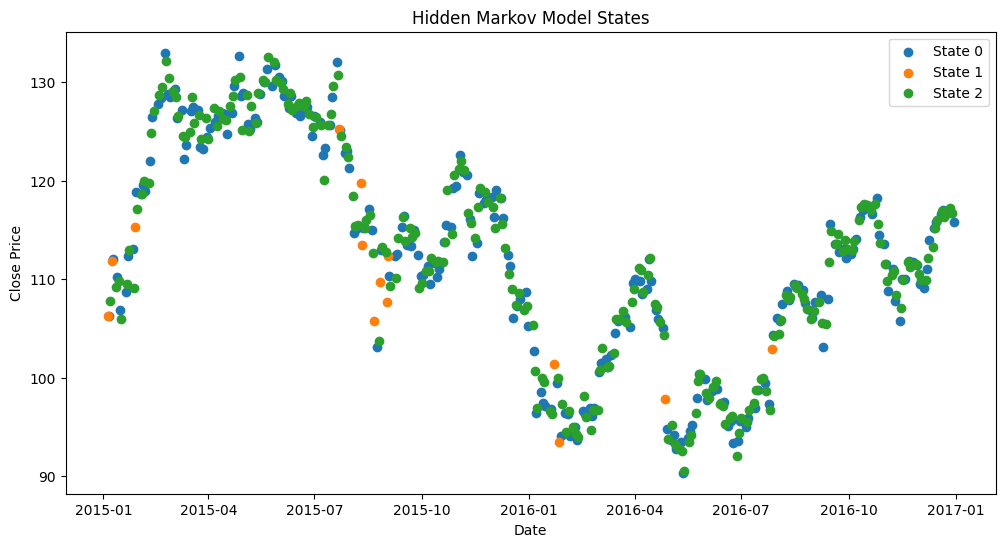

In [9]:
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt

# Load data
stocks_data = pd.read_csv("D:/Matana/Semester 4/komputasi statistik/UTS/stocks_AAPL.csv")
stocks_data["date"] = pd.to_datetime(stocks_data["date"])
stocks_data = stocks_data.sort_values("date")

# Compute Log Return
stocks_data["LogReturn"] = np.log(stocks_data["close"] / stocks_data["close"].shift(1))
stocks_data = stocks_data.dropna()

# Fit HMM model
X = stocks_data[["LogReturn"]].values
hmm_model = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000)
hmm_model.fit(X)

# Predict hidden states
stocks_data["HiddenState"] = hmm_model.predict(X)

# Plot results
plt.figure(figsize=(12, 6))
for i in range(hmm_model.n_components):
    state_data = stocks_data[stocks_data["HiddenState"] == i]
    plt.scatter(state_data["date"], state_data["close"], label=f"State {i}")
plt.legend()
plt.title("Hidden Markov Model States")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()
